In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ja import Timer
from astropy import units as u
from astropy import constants as c
from pyuvdata import UVData

In [4]:
def bl_length(uvd):
    """ Heavy forbid you want the baseline length """
    return np.sqrt(np.power(uvd.uvw_array, 2).sum(axis=1))

In [6]:
path = '/Users/jaguirre/Data/TimeDomain/'

In [7]:
timer = Timer()
timer.start()
uv8098 = UVData()
uv8098.read(path+'zen.2458098.010601_011009.calibrated.HH.uvfits')
timer.stop('Reading')

('Reading', 14.678966999053955, 'sec')


In [8]:
timer = Timer()
timer.start()
uv8099 = UVData()
uv8099.read(path+'zen.2458099.010601_011009.calibrated.HH.uvfits')
timer.stop('Reading')

('Reading', 15.603224039077759, 'sec')


In [9]:
blm8098 = bl_length(uv8098)

In [10]:
print(uv8098.lst_array.shape, uv8099.lst_array.shape)

((31694,), (31694,))


In [11]:
print(uv8098.lst_array[0], uv8099.lst_array[0])
print((uv8098.lst_array[0] - uv8099.lst_array[0])*24*3600.)

(0.2887976805393208, 0.28876137598306223)
3.1367136607414636


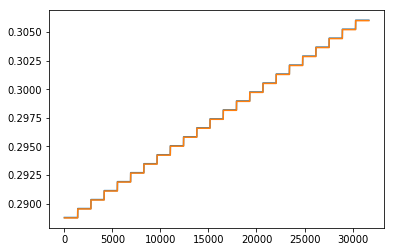

In [12]:
plt.plot(uv8098.lst_array)
plt.plot(uv8099.lst_array)

(3.135, 3.14)

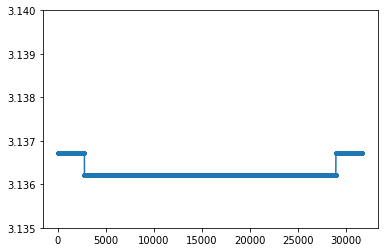

In [13]:
# Time offset.  May not be able to get around this one ... what the heck?
plt.plot(((uv8098.lst_array-uv8099.lst_array)*u.day).to(u.s),'.-')
plt.ylim([3.135,3.140])

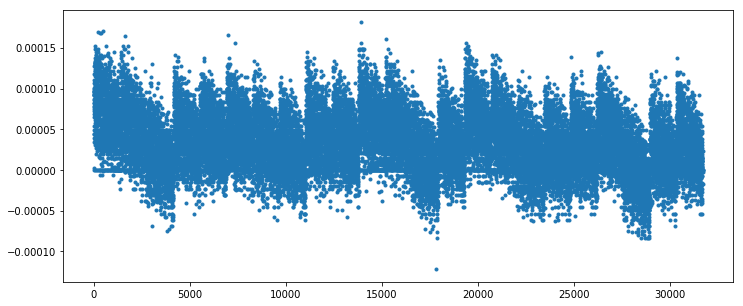

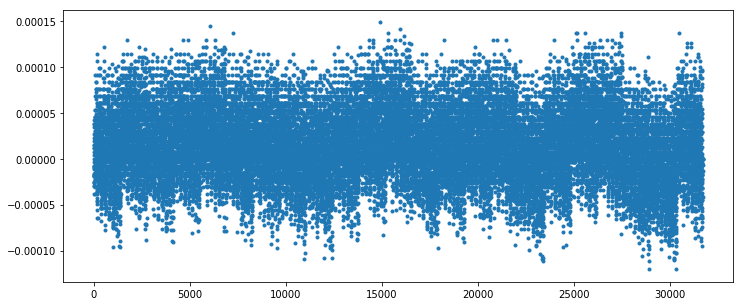

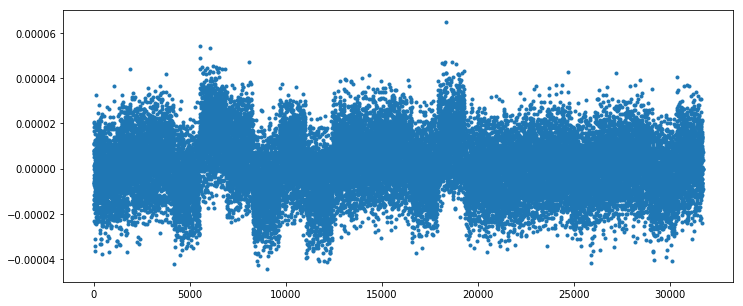

In [14]:
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,0]-uv8099.uvw_array[:,0],'.')
plt.show()
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,1]-uv8099.uvw_array[:,1],'.')
plt.show()
plt.figure(figsize=[12,5])
plt.plot(uv8098.uvw_array[:,2]-uv8099.uvw_array[:,2],'.')
plt.show()

In [26]:
ndatapts = float(np.product(np.array(uv8099.flag_array.shape)))

In [15]:
harmonized_flags = np.logical_or(uv8098.flag_array, uv8099.flag_array)

In [30]:
# am I doing this right?
print('bad frac 8098', uv8098.flag_array.sum()/ndatapts)

('bad frac 8098', 0.7623037508085126)


In [29]:
print('bad frac 8099', uv8099.flag_array.sum()/ndatapts)

('bad frac 8099', 0.6789887404753265)


In [31]:
print('bad frac total', harmonized_flags.sum()/ndatapts)

('bad frac total', 0.7741254752476809)


In [32]:
xx8098 = uv8098.data_array[:,0,:,0].squeeze()
xx8099 = uv8099.data_array[:,0,:,0].squeeze()
flags_xx = ~harmonized_flags[:,0,:,0].squeeze()
print(xx8098.shape, xx8099.shape, flags_xx.shape)

((31694, 1024), (31694, 1024), (31694, 1024))


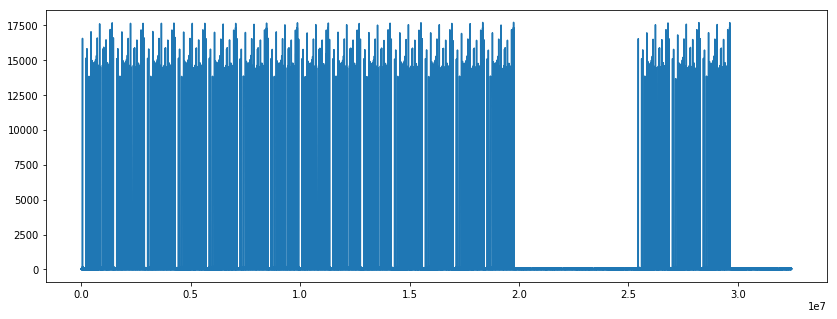

In [33]:
plt.figure(figsize=[14,5])
plt.plot(np.abs( (xx8098).flatten()) ) 
# Sigh.  Why, oh why, are they setting the flagged data to zero?

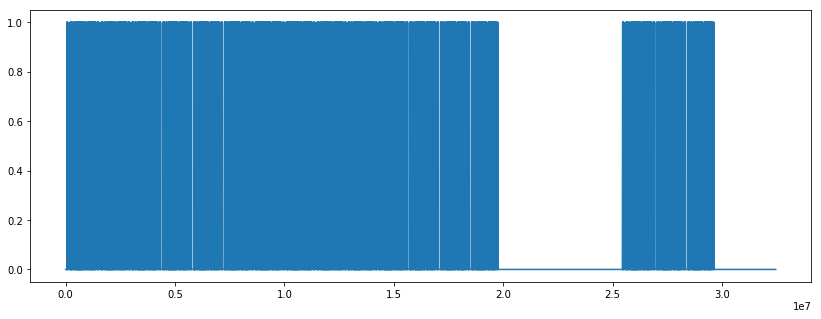

In [124]:
plt.figure(figsize=[14,5])
plt.plot( ~uv8098.flag_array[:,0,:,0].flatten() )

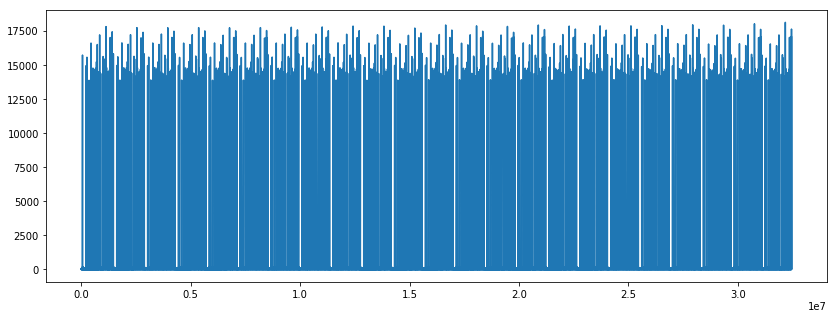

In [34]:
plt.figure(figsize=[14,5])
plt.plot(np.abs( (xx8099).flatten() ))

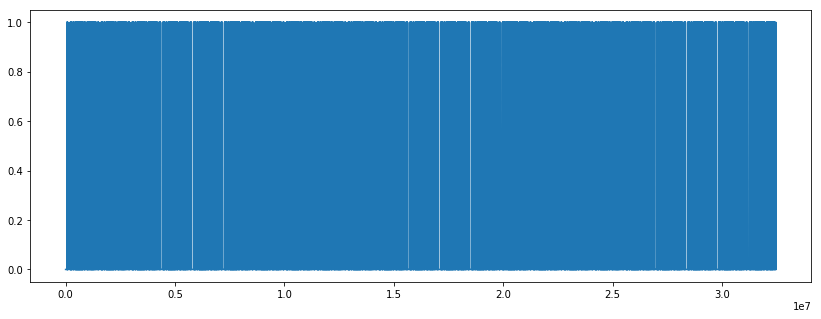

In [35]:
plt.figure(figsize=[14,5])
plt.plot( ~uv8099.flag_array[:,0,:,0].flatten() )

divide by zero encountered in divide
invalid value encountered in divide


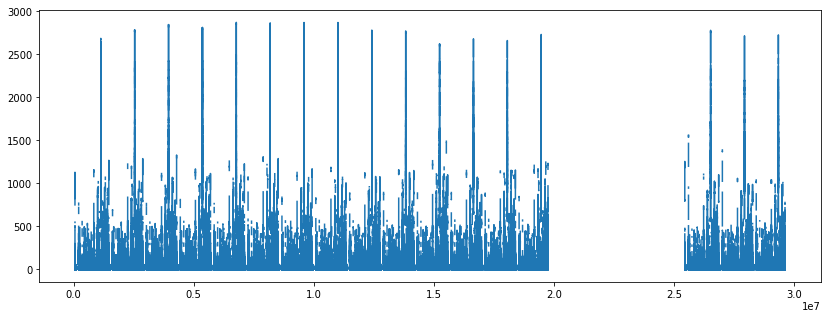

In [36]:
# wait, why are the autocorrelations showing such big differences?  those should change really smoothly ...
plt.figure(figsize=[14,5])
plt.plot(np.abs( ((xx8099-xx8098)/flags_xx).flatten() ))

In [54]:
uv8098.antenna_numbers

array([136, 140, 121,  88,  41,  86,  36,  51,  50,  98, 123, 124,  65,
       137,  82, 120, 143,  66,  83, 122,  67,  68,  69,  70,  71,  85,
         0,   1,  11,  12,  13,  14,   2,  23,  24,  25,  26,  27,  37,
        38,  39,  40,  52,  53,  54,  55,  84,  87, 141, 138, 142, 139],
      dtype=int32)

In [60]:
# Is there any way to tell from the data file which antennas have been flagged?
antno = 1

In [111]:
auto98 = uv8098.get_data((antno,antno,'xx'))
autoflags98 = np.logical_not(uv8098.get_flags((antno,antno,'xx')))
auto99 = uv8099.get_data((antno,antno,'xx'))
autoflags99 = np.logical_not(uv8099.get_flags((antno,antno,'xx')))
autoflags = np.array(np.logical_and(autoflags98, autoflags99), dtype='float64')

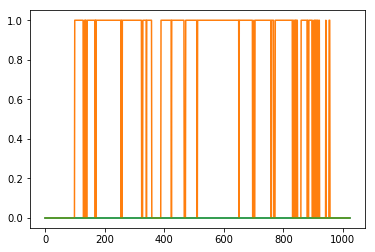

In [112]:
plt.plot(autoflags98[15,:])
plt.plot(autoflags99[15,:])
plt.plot(autoflags[15,:])

divide by zero encountered in divide
invalid value encountered in divide
divide by zero encountered in divide
invalid value encountered in divide


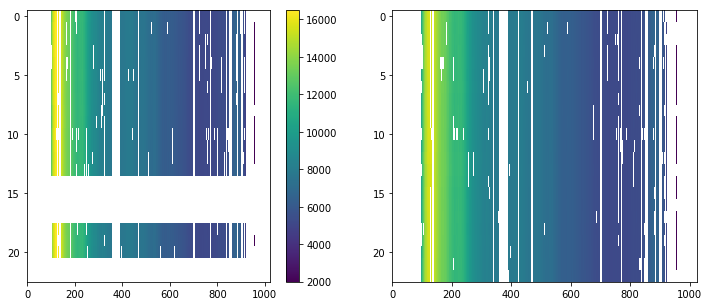

In [124]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(np.abs(auto98/autoflags),aspect='auto',vmin=2000,vmax=16500)
plt.colorbar()
plt.subplot(122)
plt.imshow(np.abs(auto99/autoflags99),aspect='auto',vmin=2000,vmax=16500)
plt.show()

divide by zero encountered in divide
invalid value encountered in divide


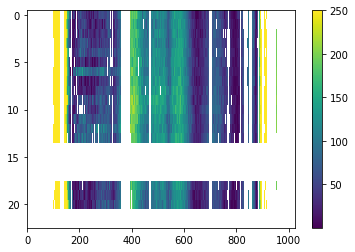

In [119]:
plt.imshow(np.abs((auto98-auto99)/autoflags),aspect='auto',vmax=250)
plt.colorbar()

divide by zero encountered in divide
invalid value encountered in divide


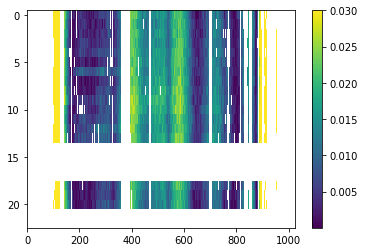

In [123]:
plt.imshow(np.abs((auto98-auto99)/auto99/autoflags),aspect='auto',vmax=0.03)
plt.colorbar()

divide by zero encountered in divide
invalid value encountered in divide
divide by zero encountered in divide
invalid value encountered in divide


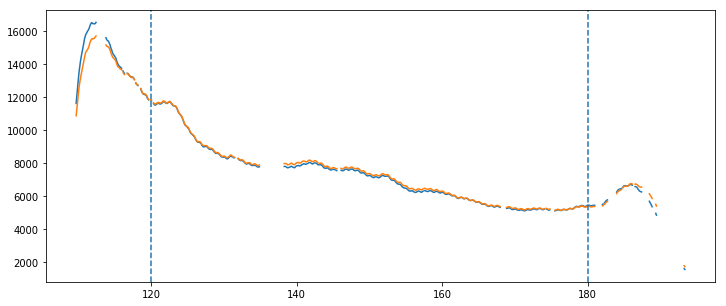

In [136]:
plt.figure(figsize=(12,5))
plt.plot(uv8098.freq_array.squeeze()/1e6,auto98[0,:]/autoflags[0,:])
plt.plot(uv8098.freq_array.squeeze()/1e6,auto99[0,:]/autoflags[0,:])
plt.axvline(120,linestyle='--')
plt.axvline(180,linestyle='--')
plt.show()

divide by zero encountered in divide
invalid value encountered in divide


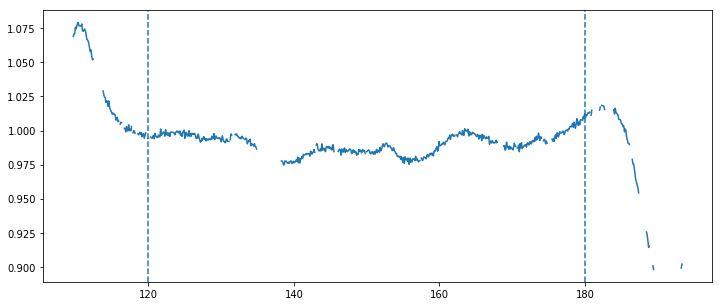

In [143]:
plt.figure(figsize=(12,5))
plt.plot(uv8098.freq_array.squeeze()/1e6,auto98[0,:]/auto99[0,:]/autoflags[0,:])
plt.axvline(120,linestyle='--')
plt.axvline(180,linestyle='--')
plt.axhline()
plt.show()

In [ ]:
def extract_autos(uvd):
    """ Sigh. """
    

In [160]:
#test = uv8098.antpairpol_iter(uv8098.get_antpairpols())

In [185]:
def to_waterfalls(uvd):
    wf = {}
    # Get the list of visibilities
    apps = uvd.get_antpairpols()
    for app in apps:
        d = uvd.get_data(app)
        f = uvd.get_flags(app)
        wf[app] = {}
        wf[app]['data'] = d
        wf[app]['flags'] = np.array(np.logical_not(f), dtype='float64')
        
    return wf

In [193]:
timer.start()
wf8098 = to_waterfalls(uv8098)
wf8099 = to_waterfalls(uv8099)
timer.stop('Waterfalls')

('Waterfalls', 4.154348134994507, 'sec')


divide by zero encountered in divide
invalid value encountered in divide


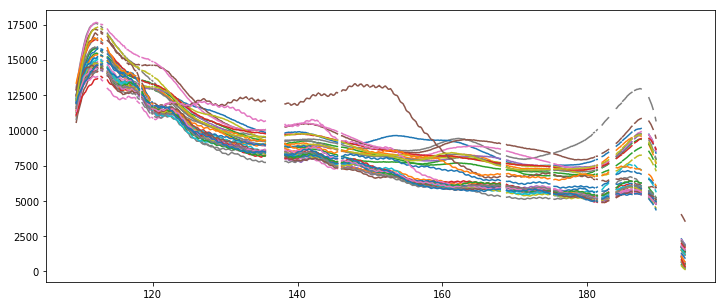

In [194]:
# This looks like maybe the reflection gains weren't applied?  Look at that fast ripple ...
plt.figure(figsize=(12,5))
for ant in uv8098.antenna_numbers:
    plt.plot(uv8098.freq_array.squeeze()/1e6, 
             wf8098[(ant,ant,'xx')]['data'][0,:]/wf8098[(ant,ant,'xx')]['flags'][0,:], 
             label=ant)
#plt.legend()    

divide by zero encountered in divide
invalid value encountered in divide
divide by zero encountered in divide
invalid value encountered in divide


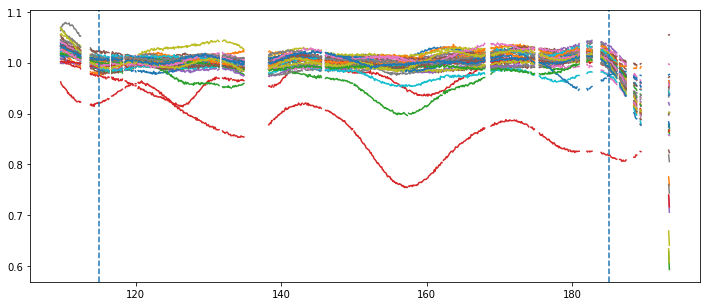

In [197]:
plt.figure(figsize=(12,5))
for ant in uv8098.antenna_numbers:
    plt.plot(uv8098.freq_array.squeeze()/1e6, 
             wf8098[(ant,ant,'xx')]['data'][0,:]/wf8099[(ant,ant,'xx')]['data'][0,:]/
             (wf8098[(ant,ant,'xx')]['flags'][0,:]*wf8099[(ant,ant,'xx')]['flags'][0,:]), 
             label=ant)
plt.axvline(115,linestyle='--')
plt.axvline(185,linestyle='--')

divide by zero encountered in true_divide


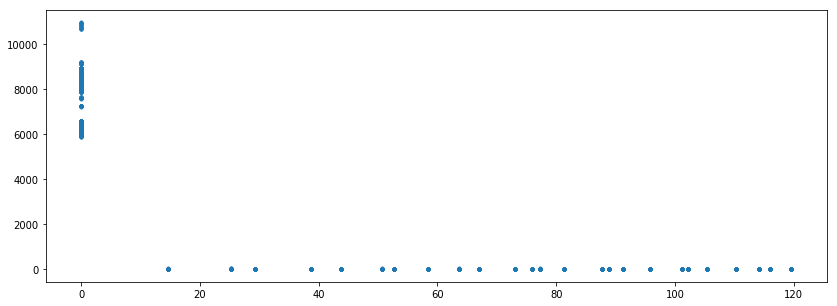

In [145]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098, np.abs(((xx8099[:,ch])/flags_xx[:,600]).flatten() ),'.')

divide by zero encountered in true_divide


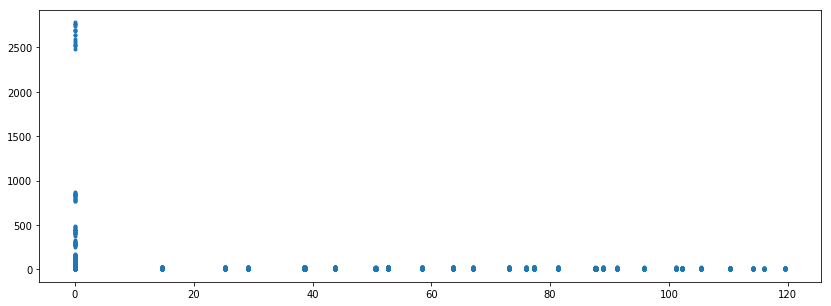

In [143]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098, np.abs(((xx8098[:,ch]-xx8099[:,605])/flags_xx[:,600]).flatten() ),'.')

divide by zero encountered in true_divide
divide by zero encountered in true_divide


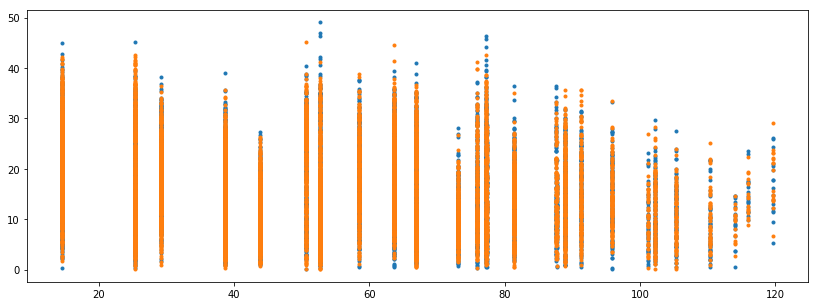

In [152]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8098[:,ch])/flags_xx[:,ch]).flatten() )[blm8098 > 0],'.')
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8099[:,ch])/flags_xx[:,ch]).flatten() )[blm8098 > 0],'.')

divide by zero encountered in true_divide


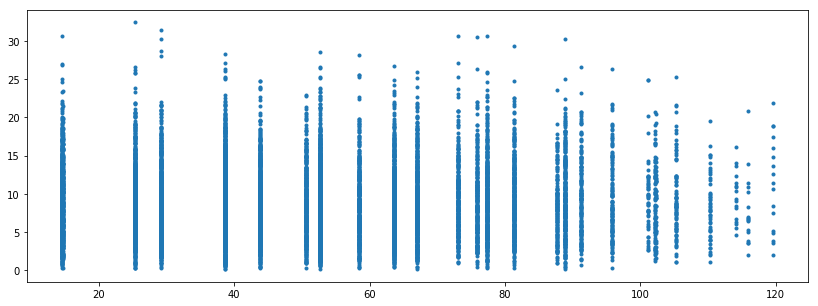

In [153]:
ch = 605
plt.figure(figsize=[14,5])
plt.plot(blm8098[blm8098 > 0], np.abs(((xx8098[:,ch]-xx8099[:,ch])/flags_xx[:,ch]).flatten() )[blm8098 > 0],'.')

In [94]:
uv8098.flag_array.shape

(31694, 1, 1024, 4)

divide by zero encountered in true_divide


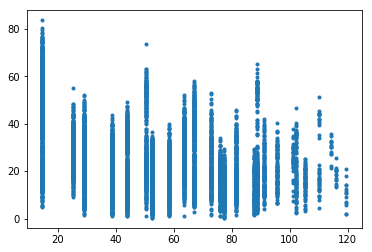

In [48]:
plt.plot(blm8098[blm8098 > 0], np.abs(uv8098.data_array[:,0,601,0]/~uv8098.flag_array[:,0,600,0])[blm8098 > 0],'.')

In [50]:
uv8098.write_uvfits?

In [ ]:
from scipy.stats import binned_statistic_2d

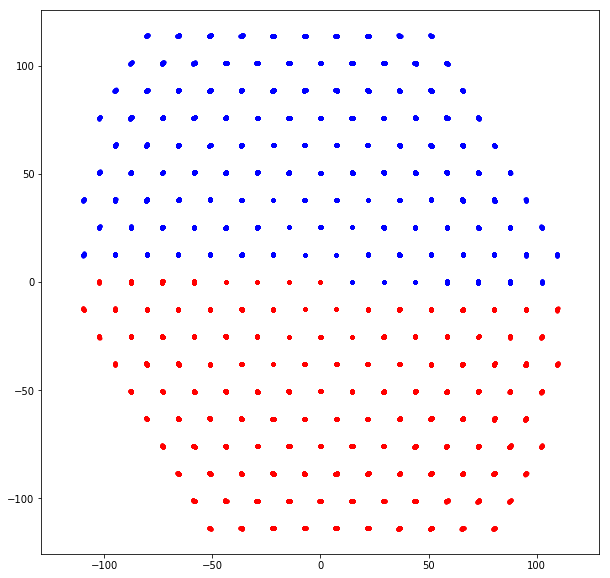

In [181]:
plt.figure(figsize=(10,10))
plt.plot(uv.uvw_array[:,0],uv.uvw_array[:,1],'b.')
plt.plot(-uv.uvw_array[:,0],-uv.uvw_array[:,1],'r.')
plt.axis('equal')
plt.show()

In [163]:
uv8098.uvw_array.shape

(31694, 3)

In [164]:
uv8098.data_array.shape

(31694, 1, 1024, 4)

In [165]:
uv8098.freq_array.shape

(1, 1024)

In [184]:
test = np.expand_dims(uv8098.uvw_array, axis=2)

In [186]:
test2 = np.repeat(test, 1024, axis=2)

In [190]:
f = uv8098.freq_array

In [201]:
test = np.repeat(np.repeat(np.expand_dims(uv.freq_array, axis = 0), 3, axis = 1), uv.Nblts, axis = 0)

In [206]:
uv8098.data_array.shape

(31694, 1, 1024, 4)

In [212]:
def true_uvw(uv):
    """ Expand the uvw_array in meters to a proper one in wavelengths for all frequencies """
    #uvw = np.zeros([uv.Nblts, 3, uv.Nspws, uv.Nfreqs, uv.Npols])
    uvw_m = np.repeat(np.expand_dims(uv.uvw_array, axis = 2), uv.Nfreqs, axis = 2)
    lmbda = (c.c/(np.repeat(np.repeat(np.expand_dims(uv.freq_array, axis = 0), 3, axis = 1), uv.Nblts, axis = 0)*u.Hz) ).value
    #print(uvw_m.shape)
    #print(lmbda.shape)
    uvw = uvw_m / lmbda
    #np.expand_dims(np.repeat(np.expand_dims(uvw_m/lmbda, axis=3), uv.Npols, axis = 3), axis=1)
    return uvw
    

In [214]:
uvw8098 = true_uvw(uv8098)

In [215]:
uvw8098.shape

(31694, 3, 1024)

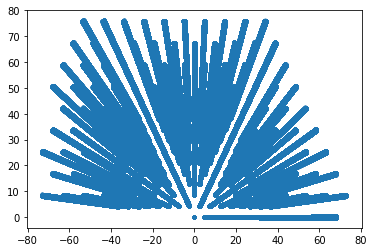

In [217]:
plt.plot(uvw8098[:,0,:].flatten(),uvw8098[:,1,:].flatten(),'.')

In [294]:
# uv gridding should be ... 1/FOV?  which depends on wavelength ...
# let's pick 
du = 1./((60*u.deg).to(u.rad).value)/2.
u_max = 80.
N_u = 2.*u_max/du

u_bins = np.linspace(-u_max, u_max, N_u)
v_bins = np.linspace(-u_max, u_max, N_u)
h, _ , _ = np.histogram2d(np.concatenate([uvw8098[:,1,:].flatten(), -uvw8098[:,1,:].flatten()]), 
                                   np.concatenate([uvw8098[:,0,:].flatten(), -uvw8098[:,0,:].flatten()]), 
                                   bins = [u_bins, v_bins])

object of type <class 'float'> cannot be safely interpreted as an integer.
object of type <class 'float'> cannot be safely interpreted as an integer.


divide by zero encountered in log10


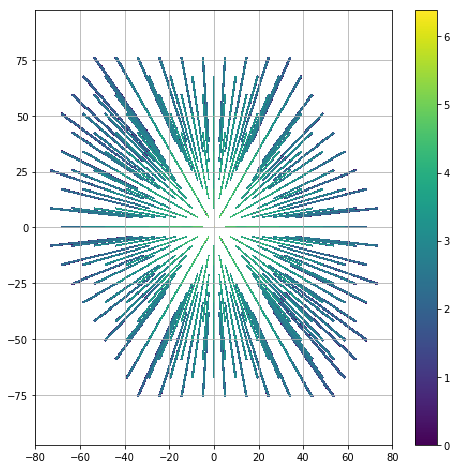

In [295]:
plt.figure(figsize=(8,8))
plt.imshow(np.log10(h),extent=[u_bins.min(), u_bins.max(), v_bins.min(), v_bins.max()], aspect='auto', origin='lower')
plt.colorbar()
plt.grid()
plt.axis('equal')
plt.show()

In [137]:
psf = np.fft.fftshift(np.abs(np.fft.fft2(h)))/psf.max()
# also need the angular scale ...
np.fft.fftfreq?

NameError: name 'h' is not defined

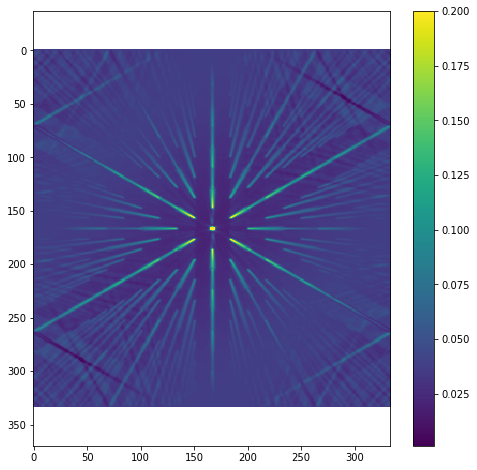

In [302]:
plt.figure(figsize=(8,8))
plt.imshow(psf, aspect='auto', vmax = 0.2)
plt.colorbar()
plt.axis('equal')
plt.show()

In [208]:
A = np.pi*np.power(1*u.m,2)
NEP = 1e-16*u.W/np.power(u.Hz,0.5)
dnu = 100*u.GHz
sens = (NEP/dnu/A).to(u.Jy*np.power(u.s,0.5))

In [210]:
(1*u.Jy)/(sens/np.sqrt(1*u.s))

<Quantity 31.41592654>